In [423]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import urllib
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

In [424]:
a = input('Enter the username:')
source = 'https://twitter.com/' + a
page = urllib.request.urlopen(source)
soup = BeautifulSoup(page, 'lxml')
print(source)

Enter the username:elonmusk
https://twitter.com/elonmusk


In [458]:
#number of replies
replies = []
for link in soup.findAll('span', 'ProfileTweet-action--reply u-hiddenVisually'):
    replies.append(int((link.find('span', 'ProfileTweet-actionCount')['data-tweet-stat-count'] or '0')))

In [459]:
#number of retweets
retweets = []
for link in soup.findAll('span', 'ProfileTweet-action--retweet u-hiddenVisually'):
    retweets.append(int((link.find('span', 'ProfileTweet-actionCount')['data-tweet-stat-count'] or '0')))

In [460]:
#number of favorites
favorites = []
for link in soup.findAll('span', 'ProfileTweet-action--favorite u-hiddenVisually'):
    favorites.append(int((link.find('span', 'ProfileTweet-actionCount')['data-tweet-stat-count'] or '0')))

In [461]:
#date
dates = []
for link in soup.findAll('span', class_=['_timestamp js-short-timestamp ', '_timestamp js-short-timestamp js-relative-timestamp']):
    dates.append(link.text)

In [462]:
#tweet
tweets = []
for link in soup.findAll('p', class_='TweetTextSize TweetTextSize--normal js-tweet-text tweet-text'):
    tweets.append(link.text)
print(len(tweets))

20


In [463]:
data = pd.DataFrame({'Replies':replies, 'Retweets':retweets, 'Favorites':favorites, 'Date':dates})
data.set_index('Date', inplace = True)
print(data)

        Replies  Retweets  Favorites
Date                                
Oct 8       921      3270      27268
15h        8253     37961     157669
16h        2521     13448      61482
Oct 12     3932     27585     167328
Oct 12      113       782       5318
Oct 12      215      1147       3475
Oct 12     1987      8783      50935
Oct 12     1617      6755      46889
Oct 10     1151      3165      30941
Oct 9      1000      4622      36459
Oct 9      1218      6295      28425
Oct 8       123       689       7527
Oct 8       186      1172       6564
Oct 8       692     10008      46033
Oct 7       118      1463       7991
Oct 8       272      1061       5459
Oct 8       149      1819      12758
Oct 8        82      1208       9046
Oct 8       454      4116      48503
Oct 7       879     11717      79605


AxesSubplot(0.125,0.125;0.775x0.755)


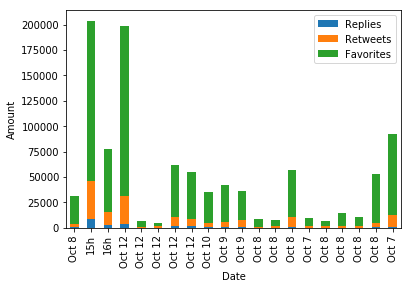

In [464]:
data_stacked_bar = data.plot(kind='bar', stacked=True)
data_stacked_bar.set_ylabel('Amount')
print(data_stacked_bar)

In [465]:
print(data.Favorites.mean())
print(data.Retweets.mean())
print(data.Replies.mean())

41983.75
7353.3
1294.15


In [466]:
print(data.Favorites.median())
print(data.Retweets.median())
print(data.Replies.median())

29683.0
3693.0
785.5
